## Data analysis for COVID-19

Data extract from github https://github.com/CSSEGISandData/COVID-19.git provided by JHU(johns-hopkins-university) CSSE USA

Data is first loaded from local repository on my computer (check for last data update)

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Load data from local repository
file_C = 'CSSEGISandData_git/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv' # confirmed cases
file_D = 'CSSEGISandData_git/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv' # death cases
file_R = 'CSSEGISandData_git/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv' # recover cases

# read csv files
df_c = pd.read_csv(file_C)
df_d = pd.read_csv(file_D)
df_r = pd.read_csv(file_R)

### Study confirmed cases in France

In [3]:
df_c.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,43,43,43,47,48,50,50,50,53,59
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,274,293,331,360,420,461,502,511,581,639
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,108,110,110,117,130,138,150,150,160,178
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,29,36,50,50,83,93,99,117,129,149


In [4]:
# Build a function to identify the index of a given value within a dataframe
def getIndexes(dfObj, value):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
 
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = dfObj.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos

In [21]:
# identify on with index the country 'France' exist
fr_index = getIndexes(df_c, 'France')
print(fr_index)

[(159, 'Province/State'), (159, 'Country/Region'), (201, 'Country/Region'), (208, 'Country/Region')]


In [24]:
# identify columns and datetime data
col_names = df_c.columns
date_data = pd.to_datetime(df_c.columns[4:])

In [26]:
# select a row of data (France) (ancient way (till 11 march 2020, now they split france in island and mainland))
# data_france = np.array(df_c.iloc[fr_index[0][0]][4:])
# data_france

array([0, 0, 2, 3, 3, 3, 4, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 11, 11, 11, 11,
       11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 18, 38, 57,
       100, 130, 191, 204, 285, 377, 653, 949, 1126, 1209, 1784, 2281],
      dtype=object)

In [58]:
# check for data only in main land France (country & region with France as name)
c_study = 'France'
for cidx, c in enumerate(df_c['Country/Region']):
    # check for country match province 
    if c==c_study and df_c['Province/State'][cidx] ==c_study:
        print('Mainland %s dataframe index is %d' %(c,cidx))
        data_france = np.array(df_c.iloc[cidx][4:])
        print(data_france)
    elif c==c_study:
        print(c,', ', df_c['Province/State'][cidx])
        print(np.array(df_c.iloc[cidx][4:]))

Mainland France dataframe index is 159
[0 0 2 3 3 3 4 5 5 5 6 6 6 6 6 6 6 11 11 11 11 11 11 11 12 12 12 12 12 12
 12 12 12 12 14 18 38 57 100 130 191 204 285 377 653 949 1126 1209 1784
 2281]
France ,  St Martin
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 2 2]
France ,  Saint Barthelemy
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 3 3 3 3 3 1 1 1]


In [59]:
# build a timeseries for france
ts_fr = pd.Series(data_france, index=date_data)

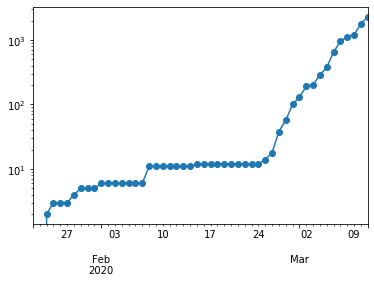

In [69]:
# plot reported cases in France, per day
ts_fr.plot()
plt.scatter(x=ts_fr.index, y=ts_fr)
plt.yscale('log')

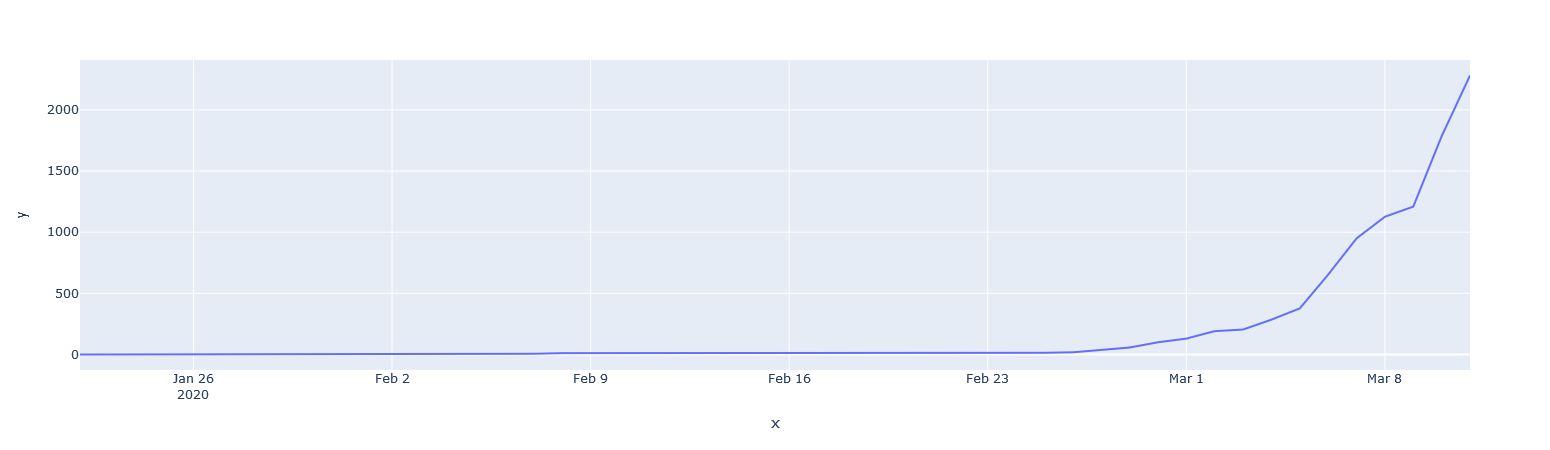

In [72]:
# plot data using plotly
fig_px = px.line(x=ts_fr.index, y=ts_fr)
fig_px.show()

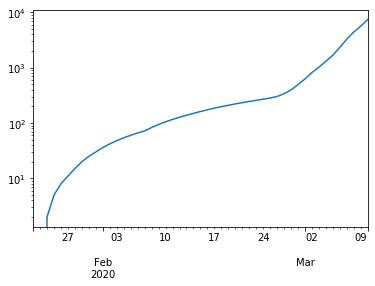

In [108]:
# plot the cumulative cases in France
ts_fr.cumsum().plot()
plt.yscale('log')